In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import clear_output
from IPython.display import HTML
import numpy as np
import dxchange
import os
import time
import warnings
import adorym

unknown_is_real_imag = True
loss_log_src_dir = 'convergence'

if unknown_is_real_imag:
    f_dict = {'delta': ['obj_phase_ds_1.tiff', 0, None],
              'probe_mag': ['probe_mag_ds_1.tiff', 0, None],
              'probe_phase': ['probe_phase_ds_1.tiff', 0, None],
              'detected': ['intermediate/detected_mag.tiff', 0, None],
              'loss_curve': ['convergence/loss.png', 0, None]
              }
else:
    f_dict = {'delta': ['delta_ds_1.tiff', 0, None],
              'probe_mag': ['probe_mag_ds_1.tiff', 0, None],
              'probe_phase': ['probe_phase_ds_1.tiff', 0, None],
              'detected': ['intermediate/detected_mag.tiff', 0, None],
              'loss_curve': ['convergence/loss.png', 0, None]
              }

def fetch_data():
    n_valid = 0
    valid_ls = []
    for id, item in enumerate(f_dict.keys()):
        if item == 'loss_curve':
            n_valid + 1
            valid_ls.append(item)
            continue
        try:
            f_dict[item][1] = os.stat(f_dict[item][0]).st_size

            if item == 'loss_curve':
                img = plt.imread(f_dict[item][0])
            else:
                img = dxchange.read_tiff(f_dict[item][0])
                if item == 'detected':
                    img = img[0]
                if item == 'delta':
                    img = img[:, :, 0]
            f_dict[item][2] = img
            n_valid += 1
            valid_ls.append(item)
        except:
            pass
    return n_valid, valid_ls

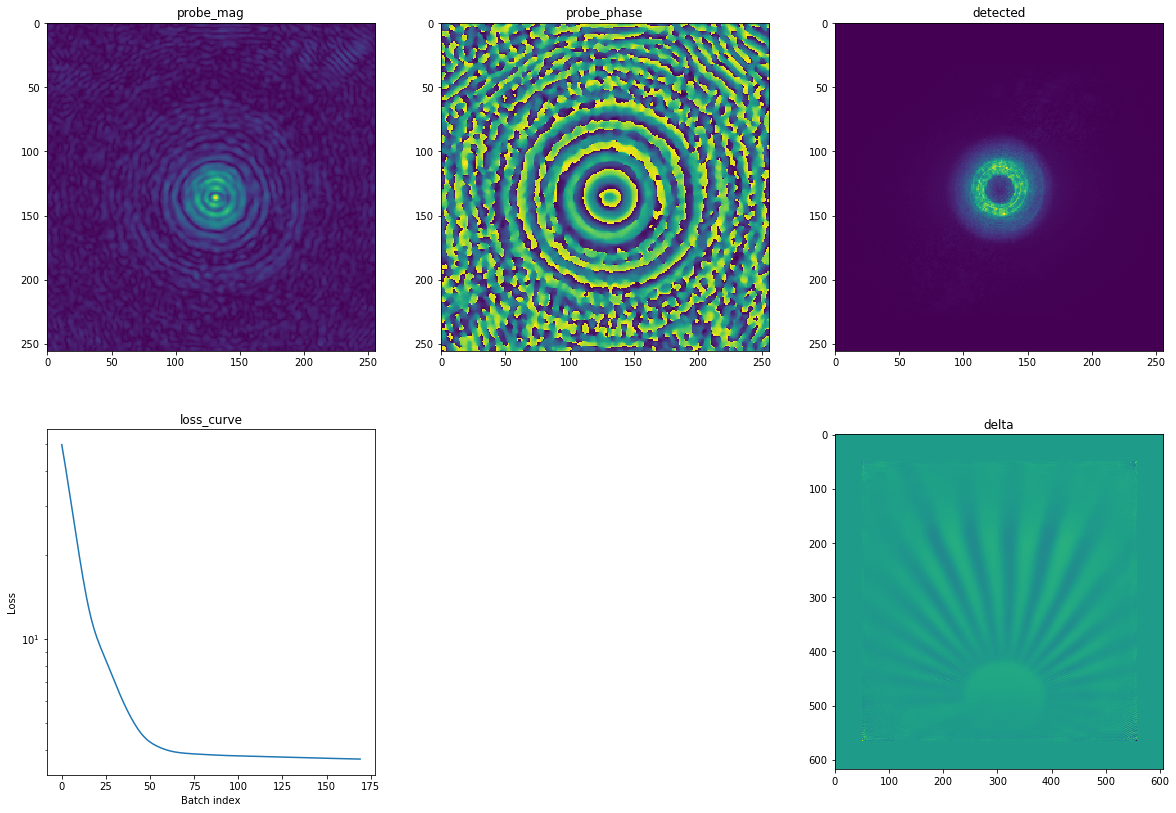

In [ ]:
%matplotlib inline
ax_dict = {}
while True:
    n_valid, valid_ls = fetch_data()
    fig = plt.figure(figsize=(20, 14))
    clear_output(wait=True)
    for id, item in enumerate(valid_ls):
        ax = plt.subplot('{}{}{}'.format(n_valid // 3 + 1, min([3, n_valid]), id))
        if item == 'loss_curve':
            loss_table = adorym.parse_loss_data(loss_log_src_dir)
            axplot, = ax.semilogy(range(len(loss_table)), loss_table)
            plt.ylabel('Loss')
            plt.xlabel('Batch index')

        else:
            axplot = ax.imshow(f_dict[item][2], animated=True)
        plt.title(item)
        ax_dict[item] = axplot
    plt.show()
    time.sleep(10)
